a)

In [1]:
import pandas as pd

# crearea dataFrame-ului
data = pd.read_csv('real_estate_data.csv')
data.head()

,Surface_area,Rooms,Distance_to_center,Price
0,87.45,3,9.13,247.02
1,145.07,4,2.78,416.78
2,123.20,3,1.88,360.14
3,109.87,1,5.15,303.50
4,65.60,4,9.86,205.48


In [2]:
# Verificam daca exista valori lipsa
print('Numarul valorilor lipsa pentru fiecare variabila:')
print(data.isnull().sum())

Numarul valorilor lipsa pentru fiecare variabila:
Surface_area          0
Rooms                 0
Distance_to_center    0
Price                 0
dtype: int64


In [3]:
frecvente = data['Rooms'].value_counts()
print(frecvente)

Rooms
1    28
4    27
3    23
2    22
Name: count, dtype: int64


In [9]:
import pymc as pm


x1 = data['Surface_area']
x2 = data['Rooms']
x3 = data['Distance_to_center']
y = data['Price']

with pm.Model() as model:
    # a priori slab informativ
    alpha = pm.Normal('alpha', mu = 0, sigma = 10)
    beta1 = pm.Normal('beta1', mu = 0, sigma = 10)
    beta2 = pm.Normal('beta2', mu = 0, sigma = 10)
    beta3 = pm.Normal('beta3', mu = 0, sigma = 10)
    eps = pm.HalfCauchy('eps', 5)

    mu = alpha + beta1 * x1 + beta2 * x2 + beta3 * x3

    # likelihood
    y_pred = pm.Normal('y_pred', mu = mu, sigma = eps, observed = y)

    idata = pm.sample(5000, tune=5000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta1, beta2, beta3, eps]


Output()

Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 61 seconds.


In [10]:
import arviz as az

az.summary(idata, var_names=['alpha', 'beta1', 'beta2', 'beta3', 'eps'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,33.106,2.518,28.266,37.771,0.026,0.019,9196.0,10002.0,1.0
beta1,2.480,0.019,2.445,2.515,0.000,0.000,11268.0,12015.0,1.0
beta2,9.555,0.475,8.685,10.468,0.004,0.003,14940.0,13687.0,1.0
beta3,-3.017,0.197,-3.387,-2.642,0.002,0.001,15798.0,13082.0,1.0
eps,5.526,0.407,4.796,6.308,0.003,0.002,16465.0,12795.0,1.0


array([<Axes: title={'center': 'beta1'}>,
       <Axes: title={'center': 'beta2'}>,
       <Axes: title={'center': 'beta3'}>], dtype=object)

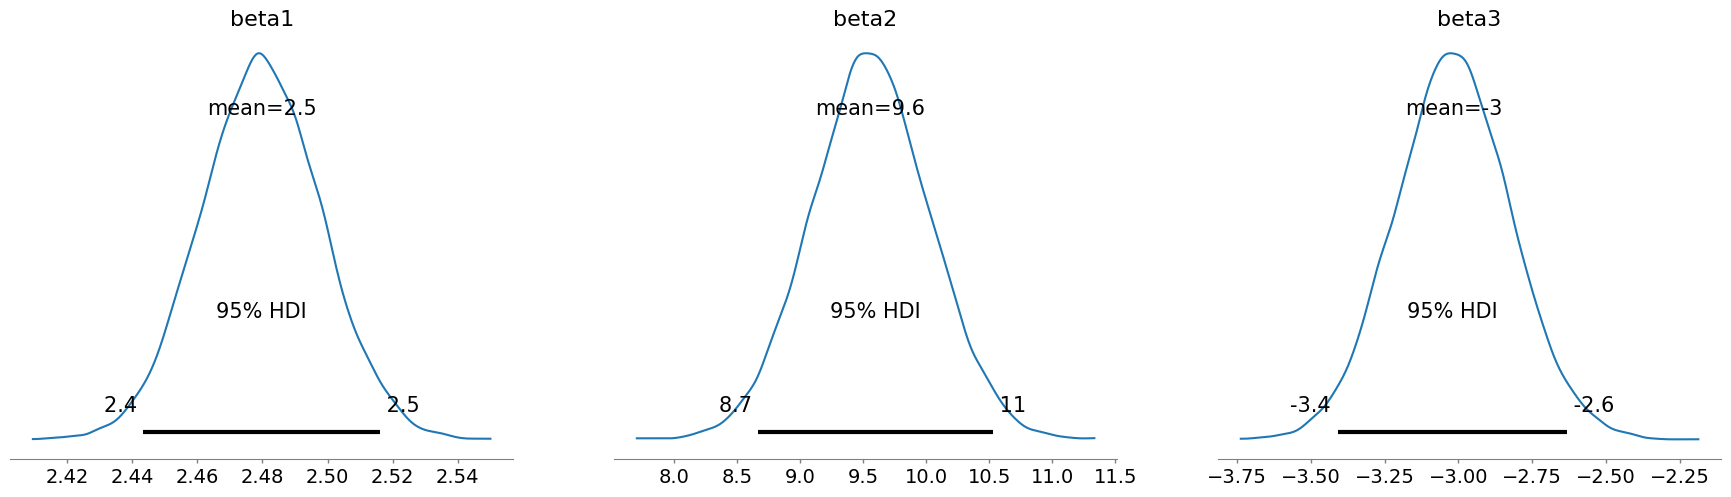

In [11]:
az.plot_posterior(
    idata, 
    var_names=["beta1", "beta2", "beta3"], 
    hdi_prob=0.95
)


b) Conform rezultatelor de mai sus, am obtinut ca valorile medii pentru beta1 = 2,5, beta2 = 9.6, iar beta3 = -3. Se observa ca pretul este influentat cel mai mult de beta2, adica de numarul de camere. Pentru fiecare camera in plus la un apartament, pretul creste in medie cu 9.6 unitati. 